In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

575

## Perform API Calls

In [46]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
#print(api_key)
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

cityName=[]
countryName=[]
cityid=[]
lon=[]
lat=[]
maxTemp=[]
humidity=[]
cloud = []
windSpeed=[]

for city in cities:
    full_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    weather_response = requests.get(full_url).json()
    print("Processing city: " + city)
    print(full_url)

    # weather api does not have info on the the randomly selected city
    # handle the exception here
    if weather_response["cod"] == "404":
        print(city + " - " + weather_response["message"])
        
    else:      
        cityName.append(weather_response["name"])
        countryName.append(weather_response["sys"]["country"])
        cityid.append(weather_response["id"])
        lon.append(weather_response["coord"]["lon"])
        lat.append(weather_response["coord"]["lat"])
        maxTemp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        cloud.append(weather_response["clouds"]["all"])
        windSpeed.append(weather_response["wind"]["speed"])
        print("City: " + weather_response["name"] + ", " + weather_response["sys"]["country"] +\
              ". City ID: " + str(weather_response["id"]))



Processing city: jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=jamestown
City: Jamestown, AU. City ID: 2069194
Processing city: emerald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=emerald
City: Emerald, AU. City ID: 2167426
Processing city: nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=nanortalik
City: Nanortalik, GL. City ID: 3421765
Processing city: sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=sentyabrskiy
sentyabrskiy - city not found
Processing city: port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=port hedland
City: Port Hedland, AU. City ID: 2063042
Processing city: angoche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0bae

Processing city: yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=yellowknife
City: Yellowknife, CA. City ID: 6185377
Processing city: ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=ponta do sol
City: Ponta do Sol, BR. City ID: 3453439
Processing city: longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=longyearbyen
City: Longyearbyen, NO. City ID: 2729907
Processing city: esna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=esna
City: Esna, RO. City ID: 675840
Processing city: goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=goderich
City: Goderich, CA. City ID: 5962442
Processing city: bol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb86

Processing city: cordoba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=cordoba
City: Cordoba, CO. City ID: 3686513
Processing city: mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=mahebourg
City: Mahebourg, MU. City ID: 934322
Processing city: itabira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=itabira
City: Itabira, BR. City ID: 3460960
Processing city: solwezi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=solwezi
City: Solwezi, ZM. City ID: 897045
Processing city: tay ninh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=tay ninh
City: Tay Ninh, VN. City ID: 1566559
Processing city: karatuzskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=

Processing city: palimbang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=palimbang
City: Palimbang, PH. City ID: 1690039
Processing city: tibagi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=tibagi
City: Tibagi, BR. City ID: 3446550
Processing city: arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=arraial do cabo
City: Arraial do Cabo, BR. City ID: 3471451
Processing city: kyakhta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=kyakhta
City: Kyakhta, RU. City ID: 2021066
Processing city: juli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=juli
City: Juli, PE. City ID: 3937516
Processing city: harlingen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de

Processing city: alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=alice springs
City: Alice Springs, AU. City ID: 2077895
Processing city: belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=belmonte
City: Belmonte, PT. City ID: 8010472
Processing city: alexandria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=alexandria
City: Alexandria, US. City ID: 4314550
Processing city: agadez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=agadez
City: Agadez, NE. City ID: 2448085
Processing city: kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=kruisfontein
City: Kruisfontein, ZA. City ID: 986717
Processing city: sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d

Processing city: gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=gat
City: Gat, SN. City ID: 2249901
Processing city: melinesti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=melinesti
City: Melinesti, RO. City ID: 673600
Processing city: kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=kahului
City: Kahului, US. City ID: 5847411
Processing city: tres arroyos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=tres arroyos
City: Tres Arroyos, AR. City ID: 3833859
Processing city: saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=saldanha
City: Saldanha, PT. City ID: 2737599
Processing city: saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=

Processing city: aloja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=aloja
City: Aloja, LV. City ID: 461539
Processing city: ylivieska
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=ylivieska
City: Ylivieska, FI. City ID: 630769
Processing city: troitskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=troitskoye
City: Troitskoye, RU. City ID: 1489209
Processing city: ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=ambon
City: Ambon, FR. City ID: 3037899
Processing city: mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=mys shmidta
mys shmidta - city not found
Processing city: mackay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=mackay
City

Processing city: waycross
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=waycross
City: Waycross, US. City ID: 4229763
Processing city: smithville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=smithville
City: Smithville, US. City ID: 4409199
Processing city: halalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=halalo
halalo - city not found
Processing city: maningrida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=maningrida
City: Maningrida, AU. City ID: 2067089
Processing city: mtimbira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=mtimbira
City: Mtimbira, TZ. City ID: 152793
Processing city: faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=faya
C

Processing city: bukama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=bukama
City: Bukama, CD. City ID: 217834
Processing city: marsa matruh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=marsa matruh
City: Marsa Matruh, EG. City ID: 352733
Processing city: chumikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=chumikan
City: Chumikan, RU. City ID: 2025256
Processing city: bogotol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=bogotol
City: Bogotol, RU. City ID: 1509852
Processing city: lakes entrance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=lakes entrance
City: Lakes Entrance, AU. City ID: 2160735
Processing city: tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0ba

Processing city: marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=marcona
marcona - city not found
Processing city: westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=westport
City: Westport, IE. City ID: 2960970
Processing city: tidore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=tidore
tidore - city not found
Processing city: dinguiraye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=dinguiraye
City: Dinguiraye, GN. City ID: 2421903
Processing city: udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=udachnyy
City: Udachnyy, RU. City ID: 2014624
Processing city: grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=grindavik
City: Grin

Processing city: bemidji
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=bemidji
City: Bemidji, US. City ID: 5017822
Processing city: coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=coquimbo
City: Coquimbo, CL. City ID: 3893629
Processing city: tehachapi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=tehachapi
City: Tehachapi, US. City ID: 5401297
Processing city: hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=hasaki
City: Hasaki, JP. City ID: 2112802
Processing city: arroio grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=arroio grande
City: Arroio Grande, BR. City ID: 3471422
Processing city: nizhniy tsasuchey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0bae

Processing city: berdigestyakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=berdigestyakh
City: Berdigestyakh, RU. City ID: 2026861
Processing city: temaraia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=temaraia
temaraia - city not found
Processing city: blackburn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=blackburn
City: Blackburn, GB. City ID: 2655524
Processing city: surman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=surman
City: Surman, LY. City ID: 2210560
Processing city: ponta delgada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=ponta delgada
City: Ponta Delgada, PT. City ID: 3372783
Processing city: tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb

Processing city: avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=avera
City: Avera, US. City ID: 4231997
Processing city: corinto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=corinto
City: Corinto, BR. City ID: 3465512
Processing city: denpasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=denpasar
City: Denpasar, ID. City ID: 1645528
Processing city: beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=beringovskiy
City: Beringovskiy, RU. City ID: 2126710
Processing city: wenling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=wenling
City: Wenling, CN. City ID: 1791464
Processing city: mattru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d625d08dc0baeb863340af989de57a18&q=m

In [48]:
print("cityName count: " + str(len(cityName)))
print("countryName count: " + str(len(countryName)))
print("cityid count: " + str(len(cityid)))
print("lon count: " + str(len(lon)))
print("lat count: " + str(len(lat)))
print("maxTemp count: " + str(len(maxTemp)))
print("humidity count: "  + str(len(humidity)))
print("cloud count: " + str(len(cloud)))
print("windSpeed count: " + str(len(windSpeed)))

cityName count: 516
countryName count: 516
cityid count: 516
lon count: 516
lat count: 516
maxTemp count: 516
humidity count: 516
cloud count: 516
windSpeed count: 516


In [49]:
# create dataframe
cityWeather_df = pd.DataFrame({"cityName" : cityName,
                               "countryName" : countryName,
                               "cityid" : cityid, 
                               "lon" : lon,
                               "lat" : lat,
                               "maxTemp" : maxTemp,
                               "humidity" : humidity,
                               "cloud" : cloud,
                               "windSpeed" : windSpeed})

cityWeather_df.head()

,cityName,countryName,cityid,lon,lat,maxTemp,humidity,cloud,windSpeed
0,Jamestown,AU,2069194,138.60,-33.21,62.70,51,80,20.51
1,Emerald,AU,2167426,148.16,-23.53,75.21,25,0,4.63
2,Nanortalik,GL,3421765,-45.24,60.14,36.69,94,0,5.97
3,Port Hedland,AU,2063042,118.58,-20.31,80.60,44,0,12.75
4,Angoche,MZ,1052944,39.91,-16.23,77.82,96,0,15.03


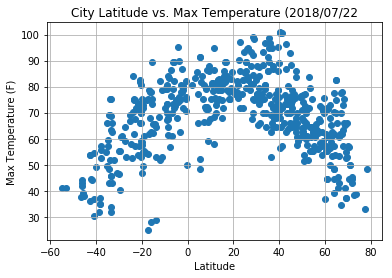

In [50]:
# Latitude vs Max Temperature Plot
plt.scatter(cityWeather_df["lat"], cityWeather_df["maxTemp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2018/07/22)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVSMaxTemperature.png")

# Show plot
plt.show()


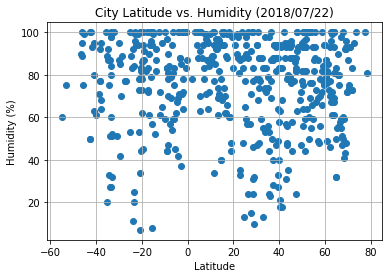

In [51]:
# Latitude vs Humidity Plot
plt.scatter(cityWeather_df["lat"], cityWeather_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2018/07/22)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVSHumidity.png")

# Show plot
plt.show()

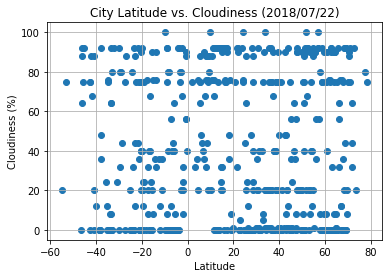

In [52]:
# Latitude vs Cloudiness Plot
plt.scatter(cityWeather_df["lat"], cityWeather_df["cloud"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2018/07/22)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVSCloudiness.png")

# Show plot
plt.show()

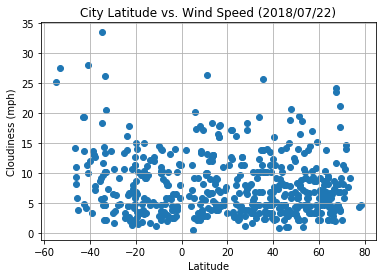

In [53]:
# Latitude vs Cloudiness Plot
plt.scatter(cityWeather_df["lat"], cityWeather_df["windSpeed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2018/07/22)")
plt.ylabel("Cloudiness (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVSWindSpeed.png")

# Show plot
plt.show()

In [54]:
# Export file as a CSV, without the Pandas index, but with the header
cityWeather_df.to_csv("CityWeather.csv", index=False, header=True)